In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from copy import copy
from labpythonlib.lab_functions import *
from tqdm import tqdm


import sys
sys.path.insert(1, '/home/emanuelsamir/Documentos/dev/concytec/journal_ws/src/motion_ur5_rviz/src/utils')
from datareader import DataReader

In [40]:
fns = ['Knot_Tying_D001.txt']#,'Knot_Tying_D002.txt','Knot_Tying_D003.txt','Knot_Tying_D004.txt','Knot_Tying_D005.txt','Knot_Tying_E001.txt','Knot_Tying_E002.txt','Knot_Tying_E003.txt','Knot_Tying_E004.txt','Knot_Tying_E005.txt','Needle_Passing_D001.txt','Needle_Passing_D002.txt','Needle_Passing_D003.txt','Needle_Passing_D004.txt','Needle_Passing_D005.txt','Needle_Passing_E001.txt','Needle_Passing_E002.txt','Needle_Passing_E003.txt','Needle_Passing_E004.txt','Needle_Passing_E005.txt','Suturing_D001.txt','Suturing_D002.txt','Suturing_D003.txt','Suturing_D004.txt','Suturing_D005.txt','Suturing_E001.txt','Suturing_E002.txt','Suturing_E003.txt','Suturing_E004.txt','Suturing_E005.txt']

In [43]:
arms = [True,False]
dscores = {}

pbar = tqdm(total=len(fns) *2)

for fn in fns:
    for arm in arms:
        folder = "../assets/dataset/"
        path = os.path.join(folder, fn)
        dr = DataReader(path)
        dr.read_dataset(arm)
        dr.calculate()

        tmp_urdf_path = "/home/emanuelsamir/Documentos/dev/concytec/journal_ws/src/ur5_description/urdf/ur5_uncertainty_0.urdf"
        dt = 0.01
        robot_tmp = Robot(np.zeros(6), np.zeros(6), dt, tmp_urdf_path)

        x0, _,_,_ = dr.dataset_trajectory_generator()
        print(x0)
        p0 = x0[0:3]
        rpy0 = x0[3:6]

        q_des= robot_tmp.inverse_kinematics_pose(p0, rpy2rot(rpy0), np.zeros(6), max_iter = 1000) 
        
        q_des = np.arctan2(np.sin(q_des), np.cos(q_des))#q_des = np.clip(q_des, a_min=-np.pi, a_max = np.pi)

        p, R = robot_tmp.forward_kinematics(q_des)
        print(p)
        print(rot2rpy(R))

        break
        qs = []

        
        while True:
            x_des, dx_des, ddx_des, dddx_des = dr.dataset_trajectory_generator()
            p_des = x_des[0:3]
            rpy_des = x_des[3:6]

            q = robot_tmp.inverse_kinematics_pose(p_des, rpy2rot(rpy_des), q_des)
            qs.append(q)
            if dr.check():
                break 
            q_des = q
        qs_ar = np.array(qs)
        pbar.update(1)

        if np.max(qs_ar) < np.pi and np.min(qs_ar) > -np.pi:
            name = 'file {} arm {}'.format(fn, 'r' if arm else 'l')
            score = np.mean([np.pi-np.max(qs_ar), np.pi + np.min(qs_ar)])
            dscores[name] = score

pbar.close()

[-0.163784    0.45904     0.088499    2.25728707 -0.60041723  0.91921652]


  0%|          | 0/2 [00:00<?, ?it/s]

[-0.163784  0.45904   0.088499]
[ 2.25728707 -0.60041723  0.91921652]


In [12]:
for w in sorted(dscores, key=dscores.get, reverse=True):
    print(w, dscores[w])

('file Needle_Passing_D001.txt arm l', 1.4444813142015274)
('file Suturing_D004.txt arm l', 1.4408438751062056)
('file Needle_Passing_D003.txt arm l', 1.4249336430369466)
('file Suturing_D005.txt arm l', 1.4184721179107653)
('file Suturing_D003.txt arm l', 1.365016718783426)
('file Suturing_E002.txt arm l', 1.335637345062232)
('file Suturing_E001.txt arm l', 1.334245953544769)
('file Suturing_D001.txt arm l', 1.295853037944102)
('file Suturing_E005.txt arm l', 1.2347690091538925)
('file Needle_Passing_D004.txt arm l', 1.2152288414553292)
('file Suturing_E003.txt arm l', 1.2149091252516975)
('file Needle_Passing_E005.txt arm l', 1.2145959191223064)
('file Knot_Tying_D004.txt arm r', 1.1231724805685528)
('file Knot_Tying_E005.txt arm r', 1.0149287145583408)
('file Suturing_D002.txt arm r', 0.8098340377427028)
('file Knot_Tying_D005.txt arm l', 0.7423733582672545)
('file Knot_Tying_D001.txt arm l', 0.7379998121805957)
('file Knot_Tying_E004.txt arm r', 0.6342137650208912)
('file Knot_Tyin

In [21]:
print(True if '1' in str(range(1,5)) else False)

True


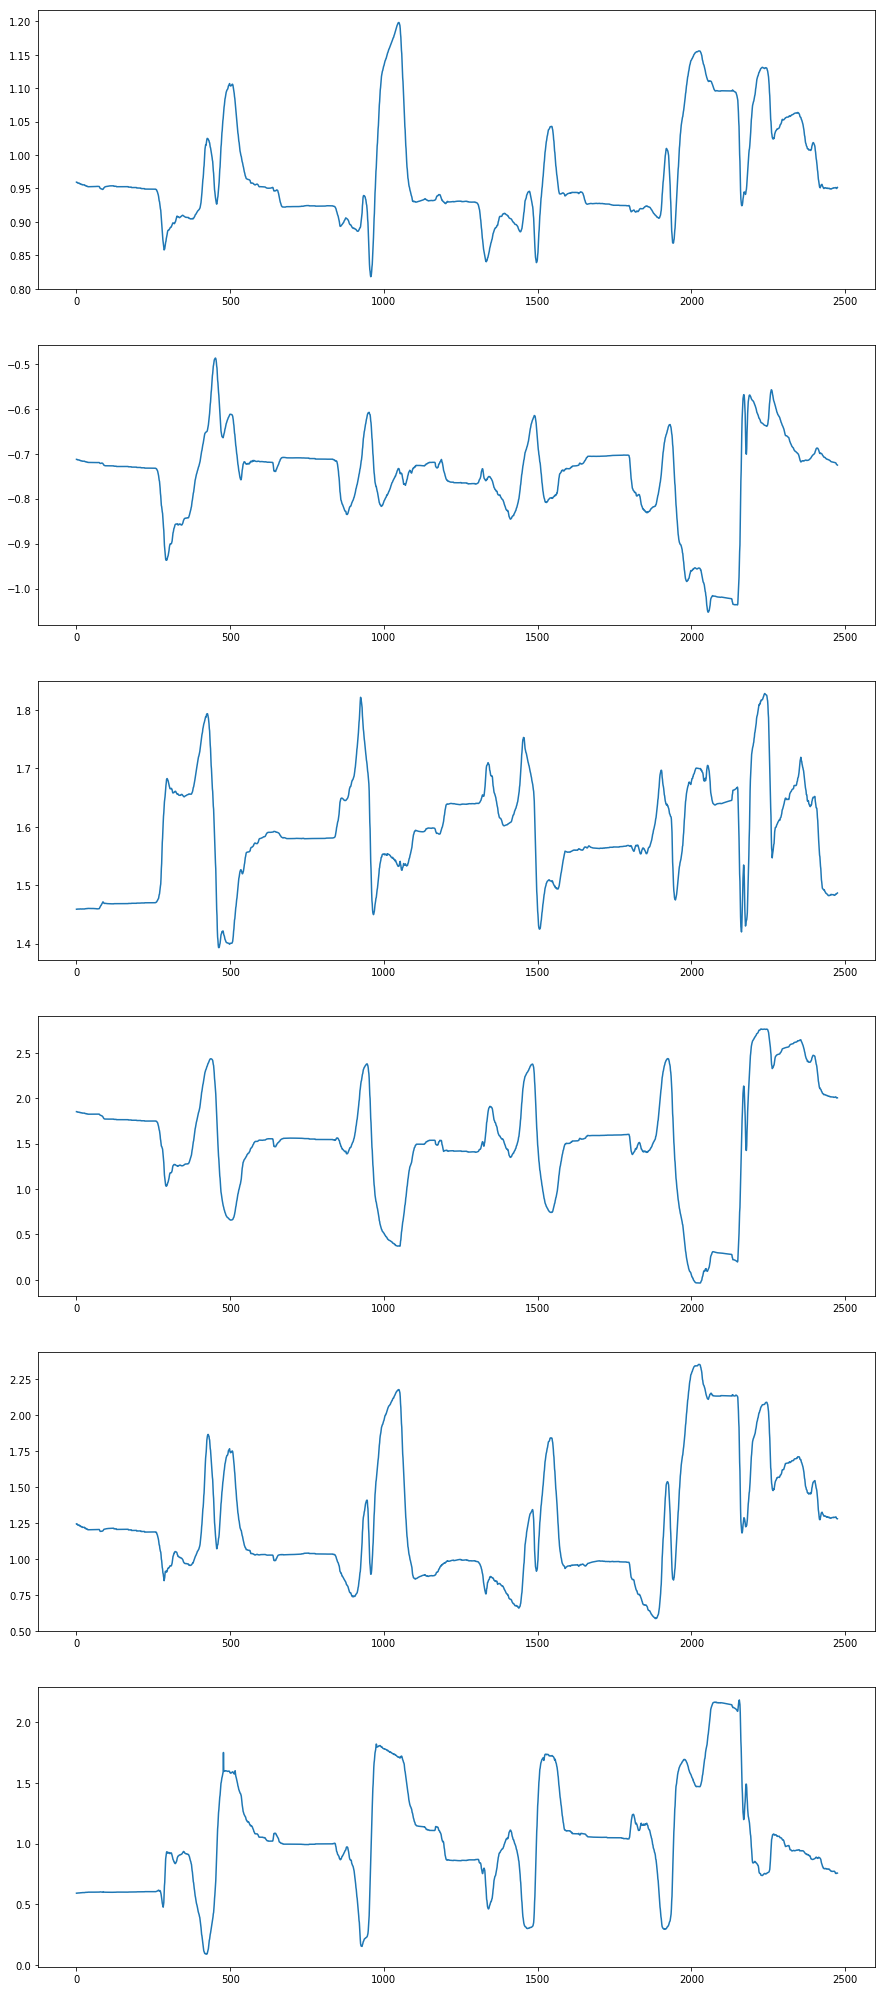

In [22]:
f,ax = plt.subplots(6, 1, figsize = (15, 6*6))
for i in range(6):
    
    ax[i].plot(qs_ar[:,i])















































































































































































































































































































































































100%|██████████| 60/60 [01:11<00:00,  1.19s/it]


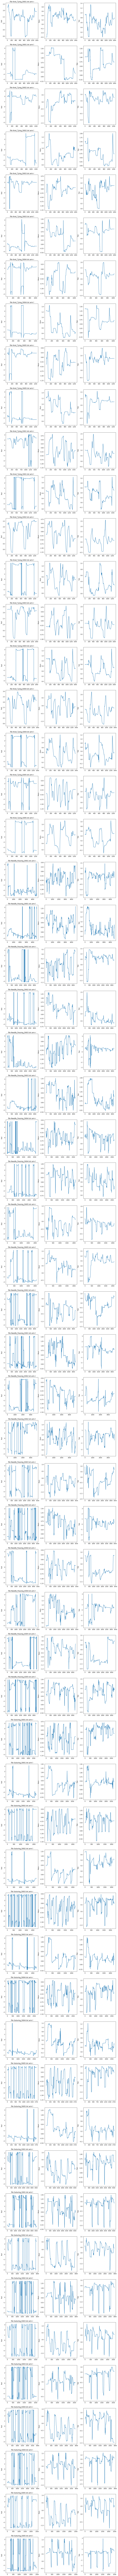

In [39]:
arms = [True,False]
dscores = {}
cases = len(fns) *2
pbar = tqdm(total=cases)

f, ax = plt.subplots(cases, 3, figsize = (15,6*cases))
i = 0
for fn in fns:
    for arm in arms:
        folder = "../assets/dataset/"
        path = os.path.join(folder, fn)
        dr = DataReader(path)
        dr.read_dataset(arm)
        dr.calculate()

        rpys = []
        rpy_ref = np.zeros(3=)

        while True:
            x_des, dx_des, ddx_des, dddx_des = dr.dataset_trajectory_generator()
            p_des = x_des[0:3]
            rpy_des = x_des[3:6]
            rpy_ref, drpy_ref, ddrpy_ref = reference_trajectory(rpy_des, rpy_ref, drpy_ref, dt)
            if dr.check():
                break 
            rpys.append(rpy_des)
        
        rpys_ar = np.array(rpys)
        pbar.update(1)

        ax[i,0].plot(rpys_ar[:,0])
        name = 'file {} arm {}'.format(fn, 'r' if arm else 'l')
        ax[i,0].set_title(name)
        ax[i,0].set_ylabel("Roll")
        ax[i,1].plot(rpys_ar[:,1], 'r')
        ax[i,1].set_ylabel("Pitch")
        ax[i,2].plot(rpys_ar[:,2], 'g')
        ax[i,2].set_ylabel("Yaw")
        i=i+1
pbar.close()

In [23]:
ix, iy, iz  = 39,40,41
iRs, iRe = 42,50
idx, idy, idz = 51,52,53
iwx, iwy, iwz = 54,55,56

counts = len(df)

rolls = []
pitches = []
yaws = []


rpy = np.array([0,0,0])

for i in range(counts):
    rot = df.iloc[i, iRs - 1: iRe].values.reshape(3,3)
    #if rpy_old:    
    rpy = rot2rpy(rot)# rot2rpy_unwrapping(rot, rpy)#
    #else:
    #    rpy = rot2rpy(rot)
    #    rpy_old = copy(rpy)
        
    rolls.append(rpy[0])
    pitches.append(rpy[1])
    yaws.append(rpy[2])
    

NameError: name 'df' is not defined

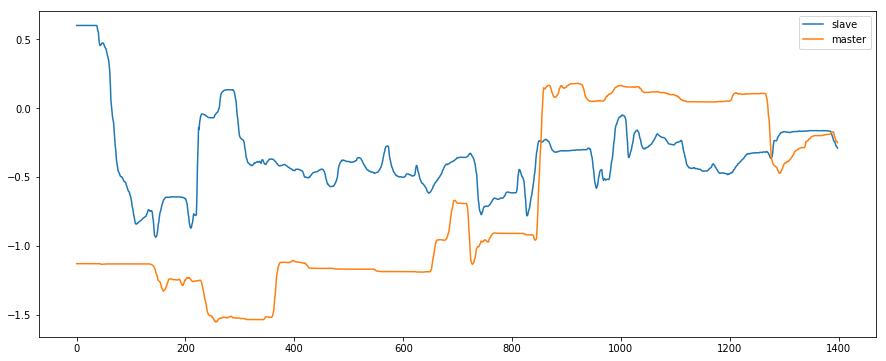

In [48]:
f, ax = plt.subplots(figsize=(15,6))
plt.plot(pitches)#[500:1500])
plt.plot(-1*np.array(pitches2))
plt.legend(['slave', 'master'])

In [47]:
ix, iy, iz  = 1, 2, 3
iRs, iRe = 4, 12
idx, idy, idz = 13, 14, 15
iwx, iwy, iwz = 16, 17, 18

counts = len(df)

rolls2 = []
pitches2 = []
yaws2 = []
xs = []
ys = []
zs = []


rpy = np.array([0,0,0])

for i in range(counts):
    x = df.iloc[i, ix - 1]
    y = df.iloc[i, iy - 1]
    z = df.iloc[i, iz - 1]
    
    rot = df.iloc[i, iRs - 1: iRe].values.reshape(3,3)

    rpy = rot2rpy_unwrapping(rot, rpy)# rot2rpy(rot)
        
    rolls2.append(rpy[0])
    pitches2.append(rpy[1])
    yaws2.append(rpy[2])

In [137]:
print(counts)

3432


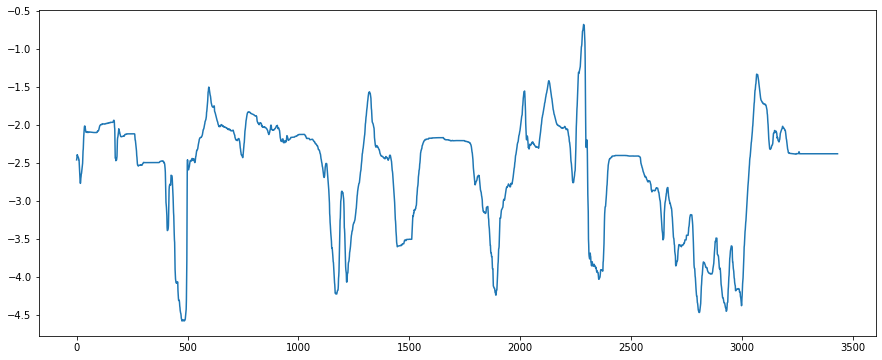

In [99]:
dxs = []
for i in range(counts):
    dx = df.iloc[i, idx - 1]
    dxs.append(dx)

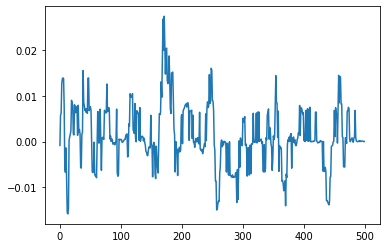

In [100]:
plt.plot(dxs[0:500])

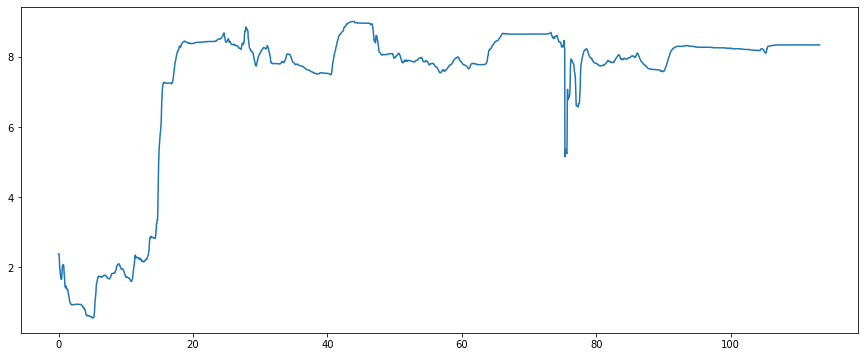

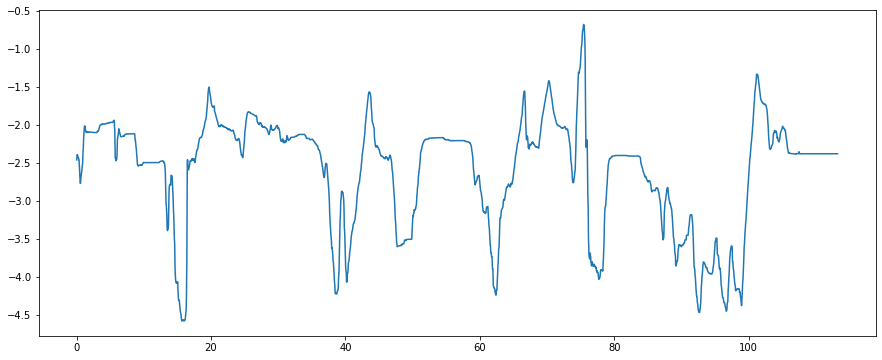

In [37]:
ixi = 1
ixf = 4
df.iloc[0, ixi - 1: ixf]

0    0.103402
1    0.012627
2    0.463011
3   -0.488976
Name: 0, dtype: float64

In [38]:
c =np.arange(6)

In [39]:
print(c)
print(c[0:3])
print(c[3:6])

[0 1 2 3 4 5]
[0 1 2]
[3 4 5]
